In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import random
import matplotlib.pyplot as plt
%matplotlib inline

## Q1 Matrix Completion

In [2]:
d_jest = sio.loadmat('jesterdata.mat') 
X = d_jest['X']

In [194]:
def matrix_completion(X,  rank=3, p_obs = 0.8):
    N = X.size                           
    N_obs= int(np.round(p_obs * N))       
    Omega = np.random.choice(N, N_obs , replace=False) 
    X_obs = np.zeros(N)
    X_obs[Omega] = X.reshape(-1)[Omega] 
    X_obs = X_obs.reshape(X.shape)
    tally = 0  
    X_old = np.zeros(X.shape)
    print(np.linalg.norm(X-X_obs))
    while np.linalg.norm(X_old-X_obs) > EPSILON:
        u, s, vt= np.linalg.svd(X_obs, full_matrices=False)
        tally += 1
        a = np.zeros(s.shape[0]-rank)
        new = np.concatenate((s[:rank], a))
        shat = np.diag(new)
        tmp = np.dot(u, shat)
        x_hat = np.dot(tmp, vt)
        x_hat = x_hat.reshape(-1)
        x_hat[Omega] = X.reshape(-1)[Omega] 
        x_hat = x_hat.reshape(X.shape)
        X_old = X_obs
        X_obs = x_hat
    print("The iteration is ", tally)    
    print(np.linalg.norm(X-X_obs))
    return X_obs

In [203]:
matrix_completion(X, 5, 0.8)

2016.1661274061735
The iteration is  51
8.98890639171306e-05
1556.741987866559


array([[ 4.68967484, -6.17      ,  0.99018856, ...,  0.14563965,
         4.17      ,  0.44      ],
       [-0.29      , -3.54      ,  3.16      , ..., -0.29      ,
         4.17      ,  7.43      ],
       [ 6.36      ,  0.44      ,  9.17      , ..., -0.29      ,
         2.19074853,  9.08      ],
       ...,
       [ 0.34      , -9.08      , -3.96717793, ...,  1.46      ,
        -0.29      ,  8.69      ],
       [-4.32      , -5.76101587, -6.02256438, ...,  0.92669513,
        -0.29      ,  8.79      ],
       [ 1.07      , -3.45      ,  0.        , ..., -0.68      ,
         4.37      ,  7.43      ]])

In [205]:
for r in range(3,10):
    print('rank is ', r)
    matrix_completion(X, r, 0.8)
    print('')

rank is  3
2013.5216491262283
The iteration is  52
8.254496925147506e-05
1594.2830511420455

rank is  4
2016.5124493292885
The iteration is  22
8.22283138349534e-05
1567.1126389524877

rank is  5
2009.9082985549383
The iteration is  42
8.508299817951663e-05
1545.7441183940937

rank is  6
2016.3264043304114
The iteration is  62
9.121277516893712e-05
1553.6524474553053

rank is  7
2016.094130391736
The iteration is  121
9.85928031891308e-05
1549.0884818345858

rank is  8
2016.123818122292
The iteration is  68
8.618737418402347e-05
1546.195866835606

rank is  9
2014.0069740693566
The iteration is  94
9.482557505217966e-05
1549.2340301494935



In [191]:
probs = [0.8, 0.6, 0.4, 0.2]
for p in probs:
    print(p)
    matrix_completion(X, 3, p)
    print('')

0.8
The iteration is  64
8.935350572575638e-05
0.6
The iteration is  135
9.381843591907067e-05
0.4
The iteration is  286
9.997321042502877e-05
0.2
The iteration is  2587
9.99566623230221e-05


## Q2  Kernel ridge classification

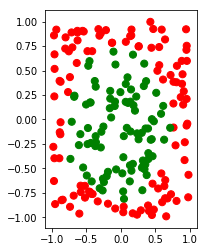

In [3]:
p = 2
n = 200
m = 100**2
np.random.seed(0)
X = 2*np.random.rand(n, p) - 1
X_test1 , X_test2 = np.meshgrid(np.linspace(-1 , 1 , 100), np.linspace(-1, 1, 100))
X_test = np.concatenate([X_test2.reshape(-1 , 1), X_test1.reshape(-1 , 1)], -1)
X = np.concatenate([X , np.ones((n, 1))] , -1)
X_test = np.concatenate([X_test , np.ones((m, 1))] , -1)
y = np.sum((X[:, 0:2] + .05)**2 , 1) < .6
z = np.array(['r'] * y.shape[0])
z[y] = 'g'
ax = plt.subplot (122)
ax.scatter(X[: , 0] , X[: , 1], 50, z, 'o', 'filled')
plt.show()

## Q2 a)

In [13]:
La = 0.5
def ridge_weights(X, y):
    XT = np.transpose(X)
    A = np.dot(XT, X)
    L =  np.identity(X.shape[1])*La
    AI = np.linalg.inv(A+L)
    tmp = np.dot(AI, XT)
    w = np.dot(tmp, y)
    return w

In [37]:
wt = ridge_weights(X, y)
wt

array([-0.03280419, -0.10407872,  0.44126944])

In [38]:
def label_plt(wt, xtest):
    yhat = np.dot(xtest, wt)
    theroshold = 0.5
    #np.median(yhat)
    print("theroshold is ", theroshold)
    yl = (np.where(yhat > theroshold, True, False)) 
    z = np.array(['r'] * yl.shape[0])
    z[yl] = 'g'
    ax = plt.subplot (122)
    ax.scatter(X_test[: , 0] , X_test[: , 1], 50, z, 'o', 'filled')
    plt.show()

theroshold is  0.5


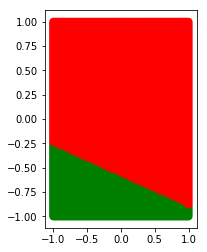

In [39]:
label_plt(wt, X_test)

## Q2 b)

In [95]:
def kernel_ridge(X, y):
    K = np.dot(X, X.T)
    K = np.square(K)
    KI = np.linalg.inv(K + La*np.identity(K.shape[0]))
    alpha = np.dot(KI, y)
    return alpha

In [51]:
a = kernel_ridge(X,  y)
a.shape

(200,)

In [89]:
X_test.shape

(10000, 3)

In [96]:
def klabel_plt(alpha, x, xtest):
    inner = np.dot(xtest, x.T)
    inner = np.square(inner)
    #inner.shape
    yhat = np.dot(inner, alpha)
    theroshold = 0.5 
    yl = (np.where(yhat > theroshold, True, False)) 
    z = np.array(['r'] * yl.shape[0])
    z[yl] = 'g'
    ax = plt.subplot(122)
    ax.scatter(X_test[: , 0] , X_test[: , 1], 50, z, 'o', 'filled')
    plt.show()

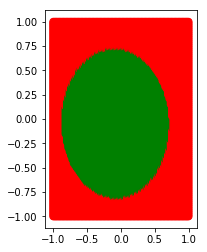

In [97]:
klabel_plt(a, X, X_test)

## Q3 d) 

In [89]:
def deblurring3(k=30, sigma=0.01):
    n = 500
    # generate random piecewise constant signal
    w = np.zeros((n, 1))
    w[0] = np.random.standard_normal()
    for i in range(1, n):
        if np.random.rand(1) < 0.95:
            w[i] = w[i-1]
        else:
            w[i] = np.random.standard_normal()

    # generate k-point averaging function
    h = np.ones(k) / k

    # make a matrix for blurring
    m = n + k - 1
    X = np.zeros((m, m))
    for i in range(m):
        if i < k:
            X[i, :i+1] = h[:i+1]
        else:
            X[i, i - k: i] = h

    X = X[:, 0:n]

    # blurred signal + noise
    y = np.dot(X, w) + sigma*np.random.standard_normal(size=(m, 1))
    wt = ridge_weights(X, y)
    yhat = np.dot(X, wt)

    # plot
    f, (ax1, ax2, ax3) = plt.subplots(1, 3)
    ax1.set_title('Signal')
    ax1.plot(w)
    ax2.set_title('Blurred and Noisy version')
    ax2.plot(y[0:n])
    ax3.set_title('Tikhinov')
    ax3.plot(yhat[0:n])

    plt.show()

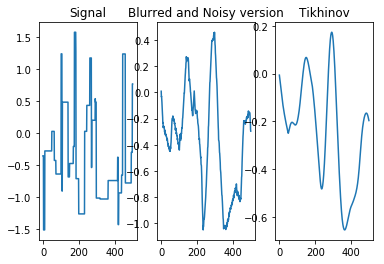

In [90]:
deblurring3(k=50, sigma=0.01)

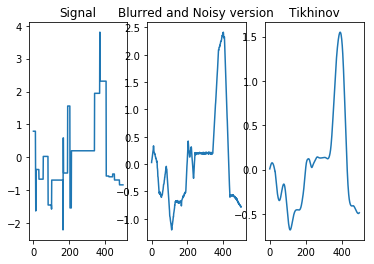

In [91]:
deblurring3(k=30, sigma=0.01)

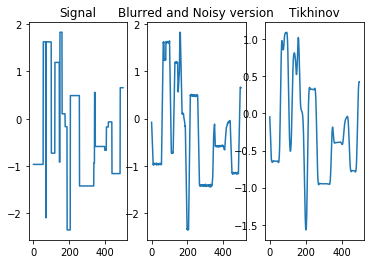

In [92]:
deblurring3(k=10, sigma=0.01)

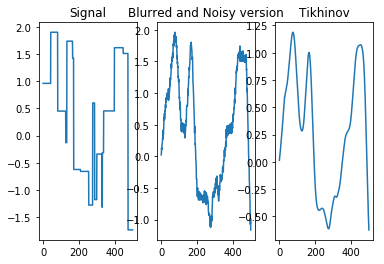

In [93]:
deblurring3(k=30, sigma=0.05)

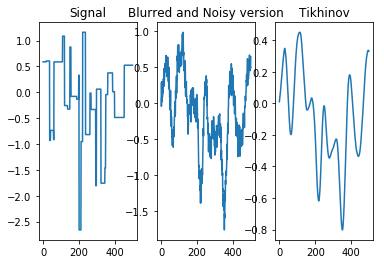

In [94]:
deblurring3(k=30, sigma=0.1)

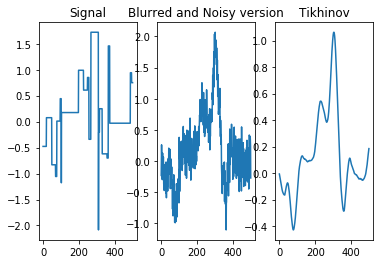

In [95]:
deblurring3(k=30, sigma=0.2)

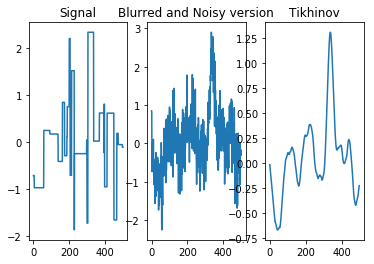

In [96]:
deblurring3(k=30, sigma=0.5)

## Q3 f)

In [23]:
def Gradient_descent(X, y, k=100):
    w = np.zeros((X.shape[1], 1))
    for i in range(X.shape[1]):
        w[i] = np.random.standard_normal()
    U, s, vt = np.linalg.svd(X, full_matrices=False)
    
    tau = 1/(s[0])**2
    for j in range(k):
        yhat = np.dot(X, w)
        y = y.reshape(yhat.shape)
        error = yhat - y
        w = w - tau*np.dot(X.T, error)

    return w

In [25]:
w = Gradient_descent(X, yr)

[-0.06570796]
[-0.05376064]
[-0.04982537]
[-0.04988884]
[-0.05172412]
[-0.05414493]
[-0.05655886]
[-0.05870316]
[-0.06049071]
[-0.06192214]
[-0.06303709]
[-0.06388812]
[-0.06452776]
[-0.06500273]
[-0.06535199]
[-0.06560676]
[-0.06579136]
[-0.06592436]
[-0.06601971]
[-0.0660878]
[-0.06613623]
[-0.06617056]
[-0.06619484]
[-0.06621196]
[-0.06622401]
[-0.06623247]
[-0.0662384]
[-0.06624255]
[-0.06624545]
[-0.06624747]
[-0.06624888]
[-0.06624986]
[-0.06625054]
[-0.06625102]
[-0.06625135]
[-0.06625158]
[-0.06625173]
[-0.06625184]
[-0.06625192]
[-0.06625197]
[-0.06625201]
[-0.06625203]
[-0.06625205]
[-0.06625206]
[-0.06625207]
[-0.06625207]
[-0.06625208]
[-0.06625208]
[-0.06625208]
[-0.06625208]
[-0.06625209]
[-0.06625209]
[-0.06625209]
[-0.06625209]
[-0.06625209]
[-0.06625209]
[-0.06625209]
[-0.06625209]
[-0.06625209]
[-0.06625209]
[-0.06625209]
[-0.06625209]
[-0.06625209]
[-0.06625209]
[-0.06625209]
[-0.06625209]
[-0.06625209]
[-0.06625209]
[-0.06625209]
[-0.06625209]
[-0.06625209]
[-0.0662

array([[-0.06625209],
       [-0.20948541],
       [-0.11528551]])

In [4]:
yr = (np.where(y ==True, 1, -1))

In [5]:
yr

array([ 1,  1,  1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,
       -1,  1, -1,  1, -1,  1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1,  1, -1,  1, -1, -1,  1,
       -1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  1,
        1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
       -1,  1, -1, -1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1,
        1, -1,  1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1,
        1, -1, -1,  1, -1, -1,  1,  1, -1, -1, -1,  1, -1,  1, -1,  1,  1,
       -1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1])

In [11]:
def deblurring4(k=30, sigma=0.01):
    n = 500
    # generate random piecewise constant signal
    w = np.zeros((n, 1))
    w[0] = np.random.standard_normal()
    for i in range(1, n):
        if np.random.rand(1) < 0.95:
            w[i] = w[i-1]
        else:
            w[i] = np.random.standard_normal()

    # generate k-point averaging function
    h = np.ones(k) / k

    # make a matrix for blurring
    m = n + k - 1
    X = np.zeros((m, m))
    for i in range(m):
        if i < k:
            X[i, :i+1] = h[:i+1]
        else:
            X[i, i - k: i] = h

    X = X[:, 0:n]

    # blurred signal + noise
    y = np.dot(X, w) + sigma*np.random.standard_normal(size=(m, 1))
    wt = ridge_weights(X, y)
    yhat = np.dot(X, wt)
    
    wg = Gradient_descent(X, y)
    yg = np.dot(X, wg)

    # plot
    f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
    ax1.set_title('Signal')
    ax1.plot(w)
    ax2.set_title('Blurred and Noisy version')
    ax2.plot(y[0:n])
    ax3.set_title('Tikhinov')
    ax3.plot(yhat[0:n])
    ax4.set_title('Gradient')
    ax4.plot(yg[0:n])

    plt.show()

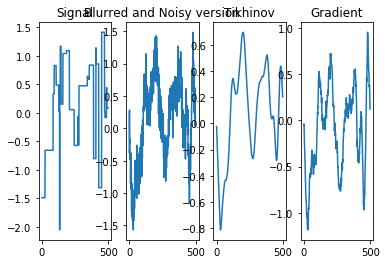

In [14]:
deblurring4(k=30, sigma=0.2)